<a href="https://colab.research.google.com/github/Victor-Hernandez-Vivanco/ML-Marathon/blob/main/ML_Marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Marathon

-------- PRIMERA ETAPA ---------------

FASE DE PREPARACIÓN DE LOS DATOS

INTRODUCCIÓN

El data frame que se comenzará a trabajar corresponde a datos de una marathon

Importación de librerias

In [ ]:
import pandas as pd

Se realiza la lectura del CSV mediante la libreria Pandas, para confirmar dicha lectura usamos el metodo shape el cual nos muestra la cantidad de libeas y filas del CSV

In [ ]:
data = pd.read_csv(r"C:\Users\Victor\Desktop\DUOC\Semestre 5\FUNDAMENTOS DE MACHINE LEARNING\Otros\Ejercicio 3\MarathonData.csv", sep=",")
print ("CSV Leido con exito")
# Asignando filas y columnas a variables
print("")
rows, files = data.shape
print(" SHAPE ".center(20, "°"))
print("")
# Mostrar el resultado en el formato deseado
print(f"Rows {rows}\nFiles {files}")

CSV Leido con exito

°°°°°° SHAPE °°°°°°°

Rows 87
Files 10


Revisamos las primeras 10 filas del Data Frame para ver su contenido mediante la función "head"

In [ ]:
data.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,NaN,1.35,2.86,A


Usamos la función "info" para revisar el tipo de datos y si existen datos faltantes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Como podemos ver en el codigo anterior nos percatamos que existen datos null o faltantes, ademas existen columnas númericas que estan como categoricas
Primero trabajaremos las columnas que contienen datos null o faltantes mediante la función "isnull"

Uso del metodo describe para tener la información estadistica del data frame en sus columnas numericas

In [ ]:
data.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [ ]:
data.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

El resultado nos muestra que las columnas Category y CrossTraining tienen datos faltantes, ambas son columnas categoricas, para Category reemplazamos con la moda y para CrossTraining reemplazamos el valor por un 0 directamente

In [ ]:
# Reemplazar los valores nulos con la moda de la columna
moda = data['Category'].mode()[0]  # La moda es el valor más frecuente
data['Category'].fillna(moda, inplace=True)

# Reemplazar los valores nulos con 0
data['CrossTraining'].fillna(0, inplace=True)

# Mostrar el DataFrame después de reemplazar los valores nulos
print("\nDataFrame después de reemplazar valores nulos con la moda para Category y con 0 para CrossTraining:")
data.info()


DataFrame después de reemplazar valores nulos con la moda para Category y con 0 para CrossTraining:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       87 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  87 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Recordemos que "Wall21" es una columna númerica, pero el info nos indica que esta como categorica, por lo que hay que hacer la conversión a númerica, para lo cual usamos el metodo to_numeric, antes y despues de la conversión revisamos el tipo de dato de la columna para cofirmar los cambios.

In [ ]:
# Verifica el tipo de datos de la columna 'Wall21'
print("Tipo de datos antes de la conversión:")
print(data['Wall21'].dtype)

# Convertir la columna 'Wall21' a tipo numérico (float)
data['Wall21'] = pd.to_numeric(data['Wall21'], errors='coerce')

# Verifica el tipo de datos después de la conversión
print("\nTipo de datos después de la conversión:")
print(data['Wall21'].dtype)

Tipo de datos antes de la conversión:
object

Tipo de datos después de la conversión:
float64


Nuevamente usamos el metodo info para verificar todos los cambios ya realizados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       87 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  87 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


Me percato que al realizar la conversión de categorica a numerica "Wall21" tiene datos faltantes, por lo que procedo a revisar dicha columna en rango de 10 filas para poder visualizar los NaN

In [ ]:
# Mostrar la columna Wall21 en rangos de 10 filas
for i in range(0, len(data['Wall21']), 10):
    print(data['Wall21'][i:i+10])
    print()  # Imprimir una línea en blanco para separar los bloques

0    1.16
1    1.23
2    1.30
3    1.32
4    1.36
5    1.32
6    1.38
7    1.41
8    1.38
9    1.35
Name: Wall21, dtype: float64

10    1.42
11    1.40
12    1.37
13    1.41
14    1.44
15    1.45
16    1.44
17    1.44
18    1.45
19    1.41
Name: Wall21, dtype: float64

20    1.45
21    1.50
22    1.50
23    1.48
24    1.52
25     NaN
26    1.54
27    1.52
28    1.50
29    1.57
Name: Wall21, dtype: float64

30    1.62
31    1.60
32    1.51
33    1.58
34     NaN
35    1.62
36    1.56
37    1.61
38    1.50
39    1.60
Name: Wall21, dtype: float64

40    1.59
41    1.68
42    1.78
43    1.62
44    1.67
45    1.67
46    1.66
47    1.67
48    1.55
49    1.64
Name: Wall21, dtype: float64

50    1.67
51     NaN
52    1.65
53     NaN
54    1.77
55    1.67
56    1.71
57    1.72
58    1.67
59    1.77
Name: Wall21, dtype: float64

60    1.76
61    1.63
62    1.66
63    1.69
64    1.69
65    1.88
66    1.93
67    1.74
68    1.75
69    1.80
Name: Wall21, dtype: float64

70    1.81
71    1.76
72    1.

Con esto confirmo que la columna Wall21 siempre tubo valores NaN, que no se visualizaron anteriormente ya que estaba definida como categorica y al transformarla a numerica recien se pudieron observar, para lo cual voy a realizar la imputación con el metodo KNN Imputer con los 3 vecinos cercanos.

In [ ]:
# Contar la cantidad de valores nulos en la columna Wall21
nulos_wall21 = data['Wall21'].isnull().sum()

# Mostrar la cantidad de valores nulos
print(f"Cantidad de valores nulos en la columna Wall21: {nulos_wall21}")

Cantidad de valores nulos en la columna Wall21: 6


Imputación con el metodo KNN vecinos en relación de los 5 más cercanos y la imputación será con la moda

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Verificar la cantidad de valores nulos antes de la imputación
print(f"Cantidad de valores nulos en la columna Wall21 antes de imputación: {data['Wall21'].isnull().sum()}")

# Crear un imputador KNN (utilizando k=5 vecinos, que es el valor predeterminado)
imputer = KNNImputer(n_neighbors=5)

# Aplicar el imputador solo a la columna 'Wall21'
data[['Wall21']] = imputer.fit_transform(data[['Wall21']])

# Verificar la cantidad de valores nulos después de la imputación
print(f"Cantidad de valores nulos en la columna Wall21 después de imputación: {data['Wall21'].isnull().sum()}")

# Mostrar los primeros valores imputados
print("\nValores de la columna Wall21 después de la imputación con KNN:")
print(data['Wall21'].head(10))


Cantidad de valores nulos en la columna Wall21 antes de imputación: 6
Cantidad de valores nulos en la columna Wall21 después de imputación: 0

Valores de la columna Wall21 después de la imputación con KNN:
0    1.16
1    1.23
2    1.30
3    1.32
4    1.36
5    1.32
6    1.38
7    1.41
8    1.38
9    1.35
Name: Wall21, dtype: float64


Verifico realmente si Wall21 ya no tiene valores NaN

In [ ]:
# Contar la cantidad de valores nulos en la columna Wall21
nulos_wall21 = data['Wall21'].isnull().sum()

# Mostrar la cantidad de valores nulos
print(f"Cantidad de valores nulos en la columna Wall21: {nulos_wall21}")

Cantidad de valores nulos en la columna Wall21: 0


In [ ]:
data.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,0,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.612903,0,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.594340,0,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.694611,0,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.770492,ciclista 1h,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.365079,0,1.35,2.86,A


Uso del metodo describe para tener la información estadistica del data frame en sus columnas numericas

In [ ]:
data.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.203014,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.490000,3.045000
50%,44.000000,58.800000,12.163424,1.630617,3.320000
75%,65.500000,77.500000,12.854036,1.755000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


Genero histograma para ver la distribución de los datos ya que sera de utilidad al momento de definir las columnas para el modelo

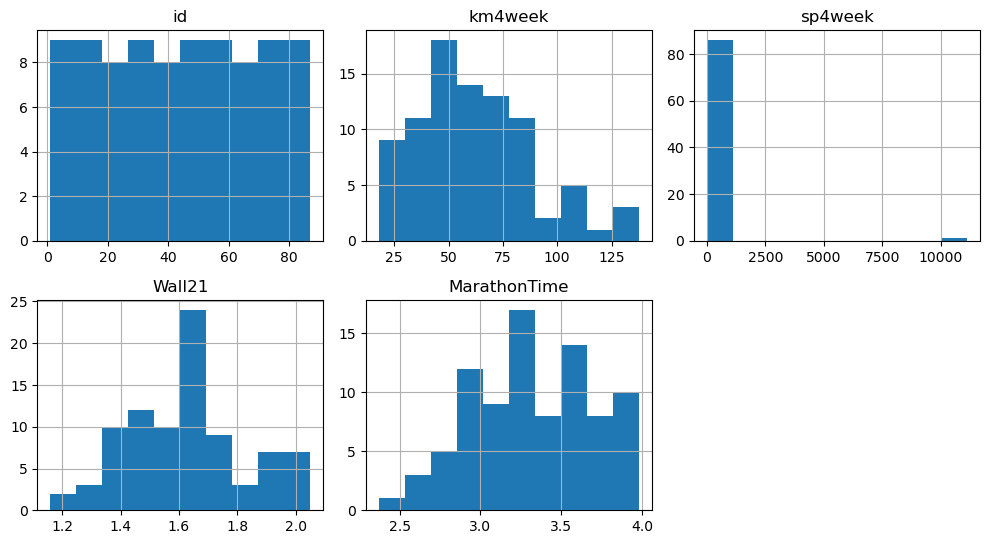

In [ ]:
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura y el layout de los histogramas
data.hist(figsize=(10, 8), layout=(3, 3))  # Cambia el layout según el número de columnas

# Mostrar los histogramas
plt.tight_layout()  # Evitar que los gráficos se superpongan
plt.show()


Realizo el cambio de valores para las columnas Category y CrossTraining a valores numericos

Primero reviso los valores unicos de Category para ver a que valores reemplazar

In [ ]:
# Obtener los valores únicos de la columna 'Category'
valores_unicos = data['Category'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Category':")
print(valores_unicos)

Valores únicos en la columna 'Category':
['MAM' 'M45' 'M40' 'M50' 'M55' 'WAM']


Category tiene 6 valores unicos por lo que los reemplazo de forma correlativa del 1 al 6

In [ ]:
valores_Category = {'Category' : { 'MAM': 1 , 'M45': 2 , 'M40': 3 , 'M50': 4 , 'M55': 5 , 'WAM': 6  }}
data.replace( valores_Category, inplace = True )
print(data['Category'].head(10))

0    1
1    1
2    1
3    2
4    1
5    3
6    3
7    2
8    1
9    2
Name: Category, dtype: int64


Confirmo que se hallan realizado los cambios

In [ ]:
# Obtener los valores únicos de la columna 'Category'
valores_unicos = data['Category'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Category':")
print(valores_unicos)

Valores únicos en la columna 'Category':
[1 2 3 4 5 6]


Segundo reviso los valores unicos de CrossTraining para ver a que valores reemplazar

In [ ]:
# Obtener los valores únicos de la columna 'Category'
valores_unicos = data['CrossTraining'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'CrossTraining':")
print(valores_unicos)

Valores únicos en la columna 'CrossTraining':
[0 'ciclista 1h' 'ciclista 4h' 'ciclista 13h' 'ciclista 5h' 'ciclista 3h']


CrossTraining tiene 5 valores unicos por lo que los reemplazo de forma correlativa del 1 al 5

In [ ]:
valores_CrossTraining = {'CrossTraining' : { 'ciclista 1h': 1 , 'ciclista 4h': 2 , 'ciclista 3h': 3 , 'ciclista 5h': 4 , 'ciclista 13h': 5 }}
data.replace( valores_CrossTraining, inplace = True )
print(data['CrossTraining'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: CrossTraining, dtype: int64


Confirmo que se hallan realizado los cambios

In [ ]:
# Obtener los valores únicos de la columna 'Category'
valores_unicos = data['CrossTraining'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'CrossTraining':")
print(valores_unicos)

Valores únicos en la columna 'CrossTraining':
[0 1 2 5 4 3]


In [ ]:
data.head(10)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,1,132.8,14.434783,0,1.16,2.37,A
1,2,Prague17,Robert Heczko,1,68.6,13.674419,0,1.23,2.59,A
2,3,Prague17,Michon Jerome,1,82.7,13.520436,0,1.30,2.66,A
3,4,Prague17,Daniel Or lek,2,137.5,12.258544,0,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,1,84.6,13.945055,0,1.36,2.74,A
5,6,Prague17,David Pecina,3,42.2,13.612903,0,1.32,2.78,A
6,7,Prague17,Tomas Drabek,3,89.0,12.594340,0,1.38,2.81,A
7,8,Prague17,Jan Rada,2,106.0,12.694611,0,1.41,2.84,A
8,9,Prague17,Tomas Drabek,1,70.0,13.770492,1,1.38,2.83,A
9,10,Prague17,martin ?indel ?,2,84.2,13.365079,0,1.35,2.86,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       87 non-null     int64  
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  87 non-null     int64  
 7   Wall21         87 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(3), object(3)
memory usage: 6.9+ KB


Ya cocluida la primera etapa de conocer los datos y generar la limpieza y transformación del data frame, procedo a definir las columnas con las trabajaré el modelo, para lo cula procedo a eliminar las siguientes columnas que indica el codigo a continuación

In [ ]:
data = data.drop(columns=['id', 'Name', 'Marathon', 'CATEGORY'])
print('Columnas eliminadas')

Columnas eliminadas


In [ ]:
data.head(10)

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
5,3,42.2,13.612903,0,1.32,2.78
6,3,89.0,12.594340,0,1.38,2.81
7,2,106.0,12.694611,0,1.41,2.84
8,1,70.0,13.770492,1,1.38,2.83
9,2,84.2,13.365079,0,1.35,2.86


In [ ]:
data.info()
print("")
rows, files = data.shape
print(" SHAPE ".center(20, "°"))
# Mostrar el resultado en el formato deseado
print(f"Rows {rows}\nFiles {files}")
print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       87 non-null     int64  
 1   km4week        87 non-null     float64
 2   sp4week        87 non-null     float64
 3   CrossTraining  87 non-null     int64  
 4   Wall21         87 non-null     float64
 5   MarathonTime   87 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.2 KB

°°°°°° SHAPE °°°°°°°
Rows 87
Files 6



Ya definidas las columnas y los datos ya ordenados, puedo comenzar a ver tipos de correlación que pueden existir entre la variable predictoraMarathonTime y alguna otra variable. Para lo cual genero el mapa de calor de correlación y regresion lineal

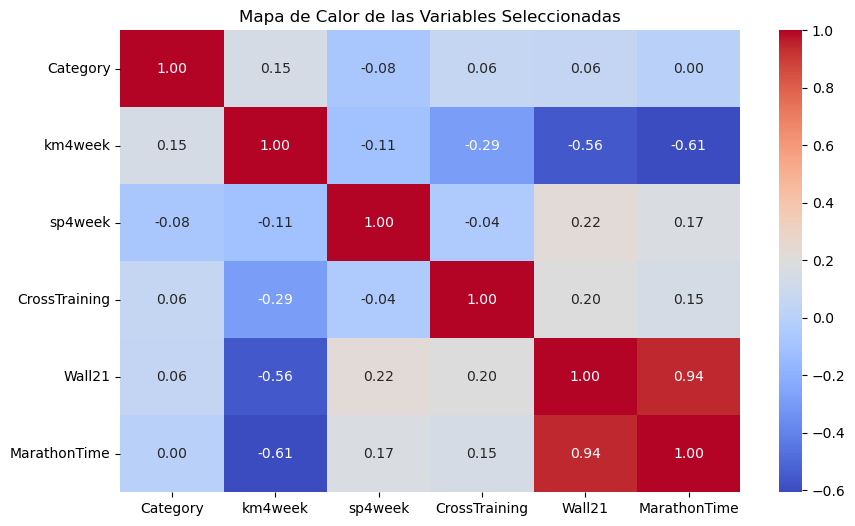

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
subset = data[['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21', 'MarathonTime']]

# Convertir la columna 'Category' a numérica si es categórica
subset['Category'] = subset['Category'].astype('category').cat.codes

# Calcular la matriz de correlación
correlacion = subset.corr()

# Generar el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.title('Mapa de Calor de las Variables Seleccionadas')
plt.show()


Correlación del Mapa de calor:
MarathonTime tiene una correlación alta y positiva con la variable Wall21 (0.94), lo que indica que estas dos variables están estrechamente relacionadas. Esto sugiere que a medida que aumenta el valor de Wall21, también lo hace el tiempo de maratón (MarathonTime)

Mediante un grafico de disperción de MarathonTime como variable independiente y Wall21 como variable dependiente confirmo la correlación de ambas variables

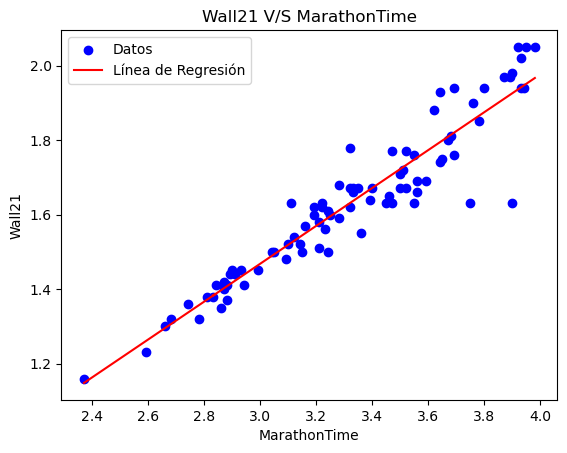

In [ ]:

x = data['MarathonTime'] # Variable predictora Independiente
y = data['Wall21'] # Variable dependiente

# Ajuste de la línea de regresión
coeficientes = np.polyfit(x, y, 1)  # 1 indica una línea recta
linea_regresion = np.polyval(coeficientes, x)

# Gráfico de dispersión
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, linea_regresion, color='red', label='Línea de Regresión')
plt.title('Wall21 V/S MarathonTime')
plt.xlabel('MarathonTime')
plt.ylabel('Wall21')
plt.legend()
plt.show()


Deteccion de Outliers utilizando en conjunto Z-score y IQR, junto con boxplots:

1.- Z-score: Detecta outliers con un Z-score mayor a 3 (valor absoluto).

2.- IQR: Detecta outliers usando el rango intercuartílico (valores fuera de Q1 - 1.5 * IQR y Q3 + 1.5 * IQR).

3.- Boxplot: Visualiza los outliers con un gráfico de caja para cada columna.

Detección de Outliers con Z-score


In [ ]:
columnas_numericas = ['km4week', 'sp4week', 'Wall21']


for col in columnas_numericas:
    print(f"\nAnalizando columna: {col}")

    # 1. Detección de outliers con Z-score
    z_scores = np.abs(stats.zscore(data[col]))
    outliers_zscore = data[col][z_scores > 3]
    print(f"Outliers detectados con Z-score en {col}:\n{outliers_zscore}\n")

    # 3. Visualización con Boxplot
    #plt.figure(figsize=(8, 6))
    #sns.boxplot(x=data[col])
    #plt.title(f'Boxplot para detectar outliers en {col} usando Z-score')
    #plt.show()



Analizando columna: km4week
Outliers detectados con Z-score en km4week:
Series([], Name: km4week, dtype: float64)


Analizando columna: sp4week
Outliers detectados con Z-score en sp4week:
81    11125.0
Name: sp4week, dtype: float64


Analizando columna: Wall21
Outliers detectados con Z-score en Wall21:
Series([], Name: Wall21, dtype: float64)



Detección de Outliers con IQR

In [ ]:
columnas_numericas = ['km4week', 'sp4week', 'Wall21']

# Iterar sobre cada columna para aplicar el método del IQR
for col in columnas_numericas:
    print(f"\nAnalizando columna: {col}")

    # 2. Detección de outliers con IQR
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = data[col][(data[col] < limite_inferior) | (data[col] > limite_superior)]
    print(f"Outliers detectados con IQR en {col}:\n{outliers_iqr}\n")

    # 3. Visualización con Boxplot
    #plt.figure(figsize=(8, 6))
    #sns.boxplot(x=data[col])
    #plt.title(f'Boxplot para detectar outliers en {col} usando IQR')
    #plt.show()



Analizando columna: km4week
Outliers detectados con IQR en km4week:
0     132.8
3     137.5
26    129.6
Name: km4week, dtype: float64


Analizando columna: sp4week
Outliers detectados con IQR en sp4week:
15       14.970492
19        8.031414
76        8.337931
81    11125.000000
Name: sp4week, dtype: float64


Analizando columna: Wall21
Outliers detectados con IQR en Wall21:
Series([], Name: Wall21, dtype: float64)



Dado que se han detectado outliers significativos en km4week y sp4week (especialmente el valor extremadamente alto en sp4week), sería más seguro usar la mediana para imputar los outliers. Esto permitirá evitar que un valor extremo distorsione la imputación y afecte la calidad de tu análisis.

In [ ]:
# Función para reemplazar outliers con la mediana
def imputar_outliers_con_mediana(df, col, limites):
    mediana = df[col].median()  # Calcular la mediana
    df[col] = np.where((df[col] < limites[0]) | (df[col] > limites[1]), mediana, df[col])  # Reemplazar outliers
    return df

# Aplicar imputación en 'km4week'
limites_km4week = [129.6, 137.5]  # Límites definidos por IQR
data = imputar_outliers_con_mediana(data, 'km4week', limites_km4week)

# Aplicar imputación en 'sp4week'
limites_sp4week = [8.03, 14.97]  # Límites definidos por IQR
data = imputar_outliers_con_mediana(data, 'sp4week', limites_sp4week)

# Verifica el resultado
data[['km4week', 'sp4week']].head()


,km4week,sp4week
0,132.8,14.434783
1,58.8,13.674419
2,58.8,13.520436
3,137.5,12.258544
4,58.8,13.945055


Nuevamente revisamos si hay Outliers para aegurarnos que los cambios fueron realizados con exito

In [ ]:
columnas_numericas = ['km4week', 'sp4week', 'Wall21']

# Iterar sobre cada columna para aplicar el método del IQR
for col in columnas_numericas:
    print(f"\nAnalizando columna: {col}")

    # 2. Detección de outliers con IQR
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = data[col][(data[col] < limite_inferior) | (data[col] > limite_superior)]
    print(f"Outliers detectados con IQR en {col}:\n{outliers_iqr}\n")


Analizando columna: km4week
Outliers detectados con IQR en km4week:
0     132.8
3     137.5
26    129.6
Name: km4week, dtype: float64


Analizando columna: sp4week
Outliers detectados con IQR en sp4week:
19    8.031414
76    8.337931
Name: sp4week, dtype: float64


Analizando columna: Wall21
Outliers detectados con IQR en Wall21:
Series([], Name: Wall21, dtype: float64)



Dado que no resulto bien la imputación anteriror, realizo un recalculo de los limites IQR para imputar nuevamente con la mediana

In [ ]:
# Recalcular límites IQR
limites_km4week = calcular_limites_iqr(data, 'km4week')
limites_sp4week = calcular_limites_iqr(data, 'sp4week')

# Imputar nuevamente los outliers
data = imputar_outliers_con_mediana(data, 'km4week', limites_km4week)
data = imputar_outliers_con_mediana(data, 'sp4week', limites_sp4week)

# Verificar los resultados después de la nueva imputación
print("Después de la nueva imputación:")
for col in ['km4week', 'sp4week']:
    limites = calcular_limites_iqr(data, col)
    outliers_iqr = data[(data[col] < limites[0]) | (data[col] > limites[1])]
    print(f"Outliers detectados con IQR en {col}:")
    print(outliers_iqr)


Después de la nueva imputación:
Outliers detectados con IQR en km4week:
Empty DataFrame
Columns: [Category, km4week, sp4week, CrossTraining, Wall21, MarathonTime]
Index: []
Outliers detectados con IQR en sp4week:
   Category  km4week    sp4week  CrossTraining  Wall21  MarathonTime
0         1     58.8  14.434783              0    1.16          2.37


Corroboro nuevamente los Outliers ya que vovlio a aparecer uno que se habia imputado anteriormente

In [ ]:
columnas_numericas = ['km4week', 'sp4week', 'Wall21']

# Iterar sobre cada columna para aplicar el método del IQR
for col in columnas_numericas:
    print(f"\nAnalizando columna: {col}")

    # 2. Detección de outliers con IQR
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = data[col][(data[col] < limite_inferior) | (data[col] > limite_superior)]
    print(f"Outliers detectados con IQR en {col}:\n{outliers_iqr}\n")


Analizando columna: km4week
Outliers detectados con IQR en km4week:
Series([], Name: km4week, dtype: float64)


Analizando columna: sp4week
Outliers detectados con IQR en sp4week:
0    14.434783
Name: sp4week, dtype: float64


Analizando columna: Wall21
Outliers detectados con IQR en Wall21:
Series([], Name: Wall21, dtype: float64)



como es un solo dato del data frame procedo a eliminar la fila donde esta el outlier de la columna sp4week

In [ ]:
indice_outlier = data[data['sp4week'] > 14].index

# Eliminar la fila utilizando drop
data = data.drop(indice_outlier)

Vuelvo a verificar presencia de Outliers

In [ ]:
columnas_numericas = ['km4week', 'sp4week', 'Wall21']

# Iterar sobre cada columna para aplicar el método del IQR
for col in columnas_numericas:
    print(f"\nAnalizando columna: {col}")

    # 2. Detección de outliers con IQR
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = data[col][(data[col] < limite_inferior) | (data[col] > limite_superior)]
    print(f"Outliers detectados con IQR en {col}:\n{outliers_iqr}\n")


Analizando columna: km4week
Outliers detectados con IQR en km4week:
Series([], Name: km4week, dtype: float64)


Analizando columna: sp4week
Outliers detectados con IQR en sp4week:
Series([], Name: sp4week, dtype: float64)


Analizando columna: Wall21
Outliers detectados con IQR en Wall21:
Series([], Name: Wall21, dtype: float64)



In [ ]:
data.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
1,1,58.8,13.674419,0,1.23,2.59
2,1,58.8,13.520436,0,1.30,2.66
3,2,58.8,12.258544,0,1.32,2.68
4,1,58.8,13.945055,0,1.36,2.74
5,3,58.8,13.612903,0,1.32,2.78


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 1 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       84 non-null     int64  
 1   km4week        84 non-null     float64
 2   sp4week        84 non-null     float64
 3   CrossTraining  84 non-null     int64  
 4   Wall21         84 non-null     float64
 5   MarathonTime   84 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.6 KB


In [ ]:
data.describe()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
count,84.000000,8.400000e+01,84.000000,84.000000,84.000000,84.000000
mean,2.023810,5.880000e+01,12.090536,0.464286,1.641592,3.340476
std,1.414011,1.000734e-13,0.916064,1.206872,0.196616,0.362700
min,1.000000,5.880000e+01,9.907734,0.000000,1.230000,2.590000
25%,1.000000,5.880000e+01,11.555808,0.000000,1.500000,3.097500
50%,1.000000,5.880000e+01,12.163424,0.000000,1.630617,3.325000
75%,3.000000,5.880000e+01,12.698590,0.000000,1.760000,3.625000
max,6.000000,5.880000e+01,13.945055,5.000000,2.050000,3.980000


-----------------------------------------------

---------------------------------------------------------------------------------------

----------   SEGUNDA ETAPA ----------------------

ETAPA DE ENTRENAMIENTO DEL MODELO

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir la variable independiente (X) y la variable dependiente (y)
X = data[['Wall21']]  # Wall21 como variable independiente
y = data['MarathonTime']  # MarathonTime como variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir con los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los coeficientes y la evaluación del modelo
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Intercepción:", modelo.intercept_)
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")


Coeficiente (pendiente): 1.6964656973686443
Intercepción: 0.5439264556444647
Error cuadrático medio (MSE): 0.029284757757604942
Coeficiente de determinación (R^2): 0.8658153808350386
